# Using a random forest to select import features for regression

In [1]:
import numpy as np
from subprocess import call
import pandas as pd
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt, pydotplus
from IPython.display import Image
from sklearn import tree, metrics, model_selection, preprocessing
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [2]:
data = skd.load_boston()
pd.DataFrame(data, columns=['Array', 'Target',"feature_names","DESCR","filename"])

Array Target feature_names  \
0    NaN    NaN          CRIM   
1    NaN    NaN            ZN   
2    NaN    NaN         INDUS   
3    NaN    NaN          CHAS   
4    NaN    NaN           NOX   
5    NaN    NaN            RM   
6    NaN    NaN           AGE   
7    NaN    NaN           DIS   
8    NaN    NaN           RAD   
9    NaN    NaN           TAX   
10   NaN    NaN       PTRATIO   
11   NaN    NaN             B   
12   NaN    NaN         LSTAT   

                                                DESCR  \
0   .. _boston_dataset:\n\nBoston house prices dat...   
1   .. _boston_dataset:\n\nBoston house prices dat...   
2   .. _boston_dataset:\n\nBoston house prices dat...   
3   .. _boston_dataset:\n\nBoston house prices dat...   
4   .. _boston_dataset:\n\nBoston house prices dat...   
5   .. _boston_dataset:\n\nBoston house prices dat...   
6   .. _boston_dataset:\n\nBoston house prices dat...   
7   .. _boston_dataset:\n\nBoston house prices dat...   
8   .. _boston_dataset:\n\nBoston house prices dat...   
9   .. _boston_dataset:\n\nBoston house prices dat...   
10  .. _boston_dataset:\n\nBoston house prices dat...   
11  .. _boston_dataset:\n\nBoston house prices dat...   
12  .. _boston_dataset:\n\nBoston house prices dat...   

                                             filename  
0   C:\Users\vinit\Anaconda3\lib\site-packages\skl...  
1   C:\Users\vinit\Anaconda3\lib\site-packages\skl...  
2   C:\Users\vinit\Anaconda3\lib\site-packages\skl...  
3   C:\Users\vinit\Anaconda3\lib\site-packages\skl...  
4   C:\Users\vinit\Anaconda3\lib\site-packages\skl...  
5   C:\Users\vinit\Anaconda3\lib\site-packages\skl...  
6   C:\Users\vinit\Anaconda3\lib\site-packages\skl...  
7   C:\Users\vinit\Anaconda3\lib\site-packages\skl...  
8   C:\Users\vinit\Anaconda3\lib\site-packages\skl...  
9   C:\Users\vinit\Anaconda3\lib\site-packages\skl...  
10  C:\Users\vinit\Anaconda3\lib\site-packages\skl...  
11  C:\Users\vinit\Anaconda3\lib\site-packages\skl...  
12  C:\Users\vinit\Anaconda3\lib\site-packages\skl...

In [3]:
reg = ske.RandomForestRegressor()

In [4]:
X = data['data']
y = data['target']

In [5]:
reg.fit(X,y)

C:\Users\vinit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [6]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
fet_ind = np.argsort(reg.feature_importances_)[::-1] #fet_ind array shows which is unqiue and random and not repeated
fet_ind

array([12,  5,  7,  0,  4, 10,  9,  6, 11,  8,  2,  1,  3], dtype=int64)

In [9]:
fet_imp = reg.feature_importances_[fet_ind]
fet_imp

array([4.76276169e-01, 3.15406706e-01, 7.16391961e-02, 4.04853404e-02,
       2.70440645e-02, 2.11149771e-02, 1.70381263e-02, 1.04395252e-02,
       1.04059852e-02, 5.01224342e-03, 3.63374361e-03, 1.12002994e-03,
       3.83893604e-04])

Text(0.5, 1.0, 'Features importance')

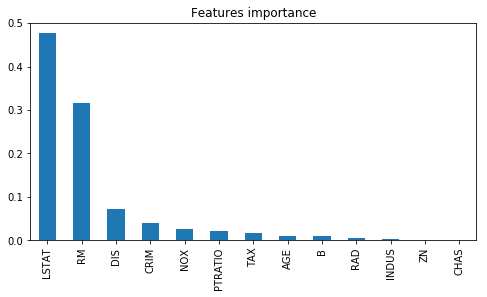

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
labels = data['feature_names'][fet_ind]
pd.Series(fet_imp, index=labels).plot('bar', ax=ax)
ax.set_title('Features importance')

Text(0, 0.5, 'Value of houses(k$)')

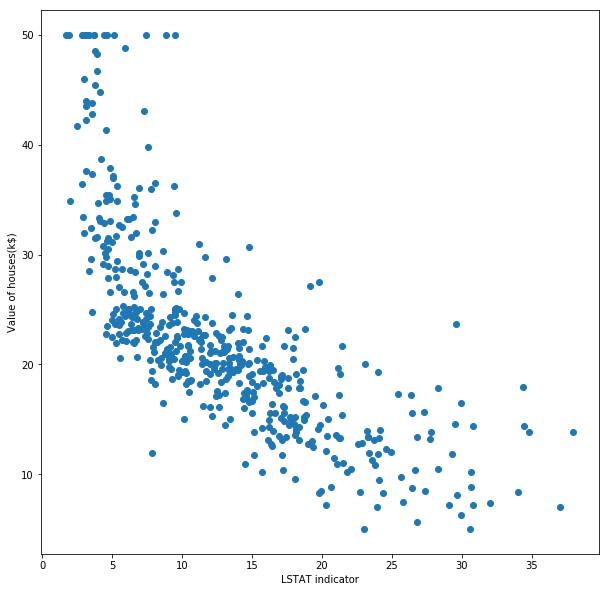

In [11]:
fig, ax=plt.subplots(1,1 , figsize=(10,10))
ax.scatter(X[:, -1], y)
ax.set_xlabel('LSTAT indicator')
ax.set_ylabel('Value of houses(k$)')

In [19]:
from sklearn import tree
tree.export_graphviz(reg.estimators_[0],
                    'tree.dot')
call(['dot','-Tpng','Tree.dot','-o','tree.png','-Gdpi=600'])

0

In [21]:
Image(filename = 'tree.png')